# Исследование надежности заемщиков.

<b>Задачи исследования и описание:
 * Заказчик — кредитный отдел банка. 
 * Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 
 * Входные данные от банка — статистика о платёжеспособности клиентов.
 <p>
 <p>  
<b>Цель исследования:</b>
    <p>Дать результаты исследования, необходимые при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## 1. Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [5]:
df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [6]:
df.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [7]:
df[df['days_employed'].isna() & df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Можно заметить, что пропуски присутсвуют в двух столбцах. Кроме того, можно заметить, что они связаны друг с другом. Пропуск в days_employed означает наличие пропуска в total_income. 

In [8]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Найдем долю пропусков от общего числа значений в интересующих нас столбцах

In [9]:
print('Процент пропусков в days_employed:', (df['days_employed'].isna().sum() / df['days_employed'].count() * 100).round(2),'%')
print('Процент пропусков в total_income:', (df['total_income'].isna().sum() / df['total_income'].count() * 100).round(2),'%')

Процент пропусков в days_employed: 11.23 %
Процент пропусков в total_income: 11.23 %


<b>Вывод: Доля пропусков слишком высока для их игнорирования или удаления из данных

## 2.Предобработка данных

### 2.1.Работа над пропусками

Прежде чем заполнить пропуски необходимо проверить размах значений.

In [10]:
print('max:', df['total_income'].max())
print('min:', df['total_income'].min())
print(df['total_income'].median())

max: 2265604.028722744
min: 20667.26379327158
145017.93753253992


<b>Вывод: Размах слишком велик чтобы применять среднее значение, поэтому для заполнения пропусков целесообразно использовать медиану, так как медиана в меньшей степени исказит значения.

In [11]:
print(df['total_income'].isna().sum()) # Проверим количество пропусков в столбце total_income

df['total_income'].fillna(df['total_income'].median(), inplace=True) # Заменим пропуски на медиану

print(df['total_income'].isna().sum()) # Проверим количество пропусков в столбце total_income

2174
0


Аналогично следует поступить и с пропусками в столбце days_employed, но там наблюдается аномалия в виде отрицательных значений трудового стажа.
Чтобы заполнить пропуски медианным значением сначала нужно привести значения в столбце days_employed к абсолютным.

In [12]:
df['days_employed'] = df['days_employed'].abs() # Заменим значения 

print(df[df['days_employed'] < 0]['days_employed'].sum()) # Проверим выполнение операции 

0.0


Теперь можно заменить пропуски в столбце days_employed

In [13]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())

In [14]:
df.isna().sum() # Убедимся, что пропусков не осталось 

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 2.2.Проверка данных на аномалии и исправления.

In [15]:
print(df['children'].unique()) # Аномалия с отрицательным значением кол-ва детей в семье 
df['children'] = df['children'].abs()
print(df['children'].unique())

[ 1  0  3  2 -1  4 20  5]
[ 1  0  3  2  4 20  5]


### 2.3. Изменение типов данных. 

В  шаге 2.1 была обнаружена и исправлена  аномалия с отрицательными значениями. Но кроме нее еще можно заменить, что значения в столбце total_income имеют тип float. Лучше привести значения к целочисленным, к типу int.

In [16]:
print(df['total_income'].dtypes) # Проверка типа данных 
df['total_income'] = df['total_income'].astype(int) # Изменение типа данных 
print(df['total_income'].dtypes) # Проверка типа данных 

float64
int32


In [17]:
print(df['days_employed'].dtypes)
df['days_employed'] = df['days_employed'].astype(int)
print(df['days_employed'].dtypes)

float64
int32


### 2.4.  Удаление дубликатов.

In [18]:
print(df.duplicated().sum()) # Проверка кол-ва дубликатов 
df = df.drop_duplicates() # Удаление дубликатов 
print(df.duplicated().sum()) # Проверка кол-ва дубликатов

54
0


Далее исправим неявные дубликаты 

In [19]:
df['education'].unique() # Проверим категориальные значения столбца education

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [20]:
df['education'] = df['education'].str.lower()
print(df['education'].unique())

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


In [21]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [22]:
df['family_status'] = df['family_status'].str.lower()
print(df['family_status'].unique())

['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'не женат / не замужем']


<p><b>Итог:</b>
<p>Для выявления явных дубликатов был использован метод duplicated(). Для их подсчета метод sum(). Затем для выявления неявных дубликатов применялся метод unique(), чтобы вывести уникальные значения и на основе этого принять решения о необходимости преобразований и каким образом провести преобразование. В столбце education значения были приведены к нижнему регистру методом str.lower(). В столбце family_status значения тоже были приведены к нижнему регистру методом str.lower(), поскольку там было замечено значение 'Не женат / не замужем'.
</p> Вероятнее всего, появление неявных дубликатов связано с тем, что значения по разному заполнялись в базе данных сотрудниками.

### 2.5. Декомпозиция

In [23]:
education_dict = df[['education_id', 'education']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
family_dict = df[['family_status_id', 'family_status']]
family_dict = family_dict.drop_duplicates().reset_index(drop=True)
df.drop(['education', 'family_status'],axis=1, inplace=True)

### 2.6. Категоризация дохода

In [24]:
def total_income_category(row): #Функция для категорий
    if row <= 30000:
        return 'E'
    if row >= 30001 and row <= 50000:
        return 'D'
    if row >= 50001 and row <= 200000:
        return 'C'
    if row >= 200001 and row <= 1000000:
        return 'B'
    if row >= 1000001:
        return 'A'

In [25]:
df['total_income_category'] = df['total_income'].apply(total_income_category)

### 2.7. Категоризация целей кредита

В данных большой разброс по целям кредита. Лучше всего создать категории, чтобы объединить цели

In [26]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [27]:
def purpose_category(row):
    if 'жиль' in row or 'недвиж' in row:
        return 'операции с недвижимостью'
    if 'автомобил' in row:
        return 'операции с автомобилем'
    if 'свадьб' in row:
        return 'проведение свадьбы'
    if 'образован'in row:
        return 'получение образования'

In [28]:
df['purpose_category'] = df['purpose'].apply(purpose_category)

## 3. Проверка гипотез

### 3.1. Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [29]:
children_debt_pivot = pd.pivot_table(df, index='children',  values='debt', aggfunc=['sum', 'count'])
children_debt_pivot['debt_percentage'] = (children_debt_pivot['sum']['debt'] / children_debt_pivot['count']['debt'] * 100).round(1)
children_debt_pivot = children_debt_pivot.sort_values('debt_percentage', ascending=False)
children_debt_pivot # Создаем сводную таблицу со столбцом, который содержит частоту задолженности по кредиту для каждой группы, затем 
# Также добавляем столбец, который содержит общее число наблюдений для каждой группы,т.е. сколько раз каждая группа вообще появлялась в df
# Добавим debt_percentage, который содержит долю должников от общего числа в каждой группе

,sum,count,debt_percentage
,debt,debt,
children,,,
20,8,76,10.5
4,4,41,9.8
2,194,2052,9.5
1,445,4856,9.2
3,27,330,8.2
0,1063,14107,7.5
5,0,9,0.0


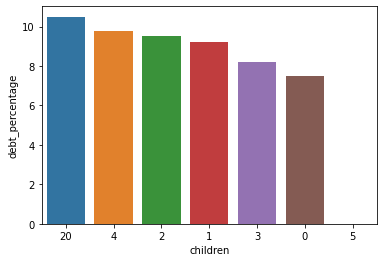

In [30]:
import seaborn as sns
sns.barplot(x=children_debt_pivot.index, y='debt_percentage', data=children_debt_pivot, order=children_debt_pivot.index)
plt.show()

<b> Вывод:</b> На первый  взгляд может показаться, что чем больше детей тем меньше случаев задолженностей по кредиту, однако в процентном соотношении чаще всего задолженности возникают у заемщиков с большим количеством детей.</p>
На первом месте по частоте случаев задержки по кредиту заемщики с количеством детей равном 20ти. Частота задержки у заемщиков с количеством детей равным 5ти отсутсвует вовсе, но этот вывод произошел лишь из-за того, что данных недостаточно для репрезентативной статистики. </p>С уверенностью  можно сказать о результатах исследования частоты в процентном соотношении для групп заемщиков с количеством детей равным : 0, 1, 2, 3. </p> Для групп с количеством детей равным 20 и 4 результат исследования тоже может считаться репрезентативным, но большее количество наблюдений даст более надежный результат. 
</p> <b> Без учета группы с количестовм детей = 5, меньше всего частота задержки по кредиту у заемщиков без детей.

### 3.2.Есть ли зависимость между семейным положением и возвратом кредита в срок?

,id_decryption,sum,count,debt_percentage
,,debt,debt,
family_status_id,,,,
4,не женат / не замужем,274,2810,9.8
1,гражданский брак,388,4163,9.3
0,женат / замужем,931,12344,7.5
3,в разводе,85,1195,7.1
2,вдовец / вдова,63,959,6.6


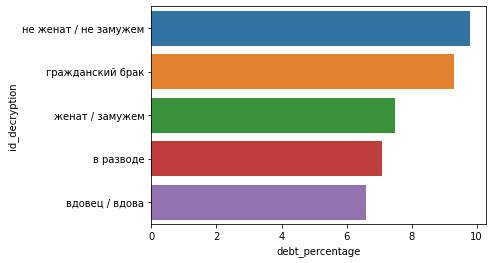

In [31]:
family_debt_pivot = pd.pivot_table(df, index='family_status_id', values='debt', aggfunc=['sum', 'count'])# Создаем сводную таблицу
family_debt_pivot['id_decryption'] = family_dict['family_status'] # Добавляем столбец с расшифровкой id для удобства
family_debt_pivot['debt_percentage'] = (family_debt_pivot['sum']['debt'] / family_debt_pivot['count']['debt'] * 100).round(1)# Добавляем столбец с процентами
family_debt_pivot = family_debt_pivot.sort_values('debt_percentage', ascending=False) # Сортируем по убыванию значений процентов 
family_debt_pivot = family_debt_pivot [['id_decryption', 'sum', 'count', 'debt_percentage']] # Меняем порядок столбцов для красоты =)

display(family_debt_pivot)
sns.barplot(x='debt_percentage', y='id_decryption', data=family_debt_pivot)
plt.show()# Немного визуализации

<b> Вывод: </b> Результаты анализа показывают, что чаще всего задолженности возникают у заемщиков не состоящих в браке(не женат / не замужем). Реже всего задолженности по кредиту возникают у групп заемщиков с семейным статусом "вдовец / вдова". </p>Числа наблюдений достаточно, чтобы считать результаты репрезентативными.
</p> Напрашивается предположение, что вероятность задержки по кредиту связана с возрастом заемщиков, так как семейное положение может быть связано с возрастом. При необходимости можно провести дополнительное исследование. 

### 3.3.Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,decryption_category,count,sum,debt_percentage
,,debt,debt,
total_income_category,,,,
E,от 0 до 30000,22,2,9.1
C,от 50001 до 200000,16033,1360,8.5
A,более 1000001,25,2,8.0
B,от 200001 до 1000000,5041,356,7.1
D,от 30001 до 50000,350,21,6.0


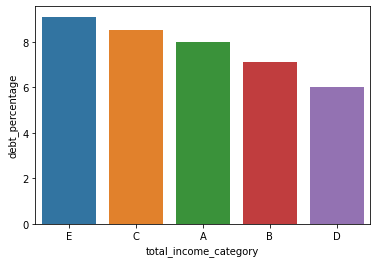

In [32]:
income_pivot = pd.pivot_table(df, index='total_income_category', values='debt', aggfunc=['sum', 'count'])
income_pivot['decryption_category'] = ['более 1000001', 'от 200001 до 1000000', 'от 50001 до 200000', 'от 30001 до 50000', 'от 0 до 30000'] #Добавим столбец с расшифровкой категорий
income_pivot['debt_percentage'] = (income_pivot['sum'] / income_pivot['count'] * 100).round(1)

income_pivot = income_pivot[['decryption_category','count','sum','debt_percentage']]
income_pivot = income_pivot.sort_values('debt_percentage', ascending=False)
display(income_pivot)
sns.barplot(x=income_pivot.index, y='debt_percentage', data=income_pivot, order=income_pivot.index)
plt.show()

<b>Вывод:
</p> Можно увидеть, что <b>больше всего</b> заемщиков среди тех, чей доход относится к <b>категории C</b>. Доля задолженностей среди заемщиков этой категории составляет <b>8.5 процентов.</b> 
</p> <b>Наименьший процент</b> задолженностей у заемщиков с доходом <b>категории D</b> и равен <b>6 процентов</b>. 
</p> <b>Наибольший процент долгов у заемщиков категории Е. Он составляет 9 процентов.</b>
</p> Но стоит имет в виду, что частота появления категорий уровня дохода А и Е недостаточна для репрезентативности. Если бы число наблюдений этих категорий было бы больше, то процент должников среди заемщиков данных уровеней дохода мог бы изменить общую картину.(А мог бы и не изменить).

### 3.3. Как разные цели кредита влияют на его возврат в срок?

,debt_percentage,clients_in_group
purpose_category,,
операции с автомобилем,9.4,4308
получение образования,9.2,4014
проведение свадьбы,8.0,2335
операции с недвижимостью,7.2,10814


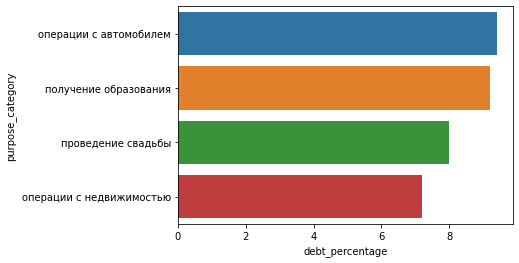

In [33]:
purpose_pivot = pd.pivot_table(df, index='purpose_category', aggfunc={'purpose_category':'count','debt':'mean'})
purpose_pivot['debt'] = (purpose_pivot['debt'] * 100).round(1)
purpose_pivot = purpose_pivot.sort_values('debt', ascending=False)
purpose_pivot = purpose_pivot.rename(columns={'debt':'debt_percentage', 'purpose_category':'clients_in_group'})
display(purpose_pivot)
sns.barplot(x='debt_percentage', y=purpose_pivot.index, data=purpose_pivot, order=purpose_pivot.index)
plt.show()


<b>Вывод:</b></p> Меньше всего случаев задолженности среди группы заемщиков цель кредита которых это <b>операции с недвижимостью</b> 	
</p>Больше всего случаев задолженности среди группы заемщиков цель кредита которых это <b>операции с автомобилем</b> 	

## Общий вывод

В ходе исследования была проведена предобработка данных. Были удалены явные дубликаты, преобразованы неявные. Была проведена работа над аномалиями. 
* Доход заемщиков и цели кредита  были разбиты  на категории, данные приведены в соответствие этой категоризации.Это упростило анализ.
* Затем были проверены гипотезы. 
* Можно сказать,исходя из анализа, что наиболее перпективный заемщик это человек без детей,вдовец или вдова с доходом от 30001 до 50000, цель кредита которого это операции с недвижимостью.
При необходимости можно в дальнейшем составить рейтинговую сводную таблицу, которая вместе с  результатами других исследований может послужить основой для разработки системы отбора благонадежных заемщиков.